# Introduction
Wine is an alcoholic drink typically made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol, carbon dioxide, and heat. Different varieties of grapes and strains of yeasts produce different styles of wine. These variations result from the complex interactions between the biochemical development of the grape, the reactions involved in fermentation, the grape's growing environment (terroir), and the production process.

__Source:__ [Wikipedia](https://en.wikipedia.org/wiki/Winemaking)

# Machine Learning Process
Cross-Industry Standard Process for Data Mining (CRISP-DM) is a process for doing data mining.  The methodolgy provides a structured approach to planning a data mining project.  It consists of several steps as shown below:
- Business Understanding
- Data Uderstanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

This workflow is adopted and followed as much as possible.

__Source:__ [CRISP-DM](https://www.sv-europe.com/crisp-dm-methodology/)

# Business Understanding

### 1) Red Wine Quality Data Set
The dataset was downloaded from UCI Macine Learning Repository.  The dataset is about wine quality.
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
The dataset purpose is to model the wine quality based on physicochemal tests.

__Dataset Source:__ [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

These datasets can be viewed as a classification or regression task.  For regression task, the model to be developed can be used to predict the quality rating.  For classification task, the model to be developed can be used to predict "Good" or "Excellent" wine rating.  For this assignment, I will be concentrating on classification task, in particular, based on the red wine dataset.  Final outcome is to predict whether a red wine is good or excellent rating based on the input attributes provided by the user.

### 2) Data Familiarisation
Red wine dataset consists of eleven input features and the last one is the label.  The input features and label are:
1.  Fixed Acidity
2.  Volatile Acidity
3.  Citric Acid
4.  Residual Sugar
5.  Chlorides
6.  Free Sulfur Dioxide
7.  Total Sulfur Dioxide
8.  Density
9.  pH
10. Sulphates
11. Alcohol
12. Quality

There are already many write-ups regarding the input features.  Below are the reference sources for a better glimpse of the data, if a better understanding is required.

**Note:** I am not a [wine aficionado or connoisseur](https://www.quora.com/What-is-a-synonym-for-wine-expert).

[Kaggle-1](https://www.kaggle.com/gpreda/red-wine-quality-simple-eda-and-prediction)
[Kaggle-2](https://www.kaggle.com/ecedolen/classification-logistic-regression-wine-quality)
[MacArdle](https://markmacardle.com/redwine_eda/index.html)
etc.

# Data Preparation
### 1) Data Exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns


In [3]:
#Red wine dataset file name
filename = 'winequality-red.csv'
#dataset URL 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

#the dataset file residing directory
#it is expected to reside in the same directory as this notebook
filedir = '.\\'
file = os.path.join(filedir, filename)

columnNames = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 
               'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'pH', 'Sulphates', 
               'Alcohol', 'Quality']

wdf = pd.read_csv(filename, sep=';', names=columnNames, skiprows=1)


In [6]:
#sanity check by printing the shape and some rows (head and tail)
print('Rows => {}\nColumns => {}'.format(wdf.shape[0], wdf.shape[1]))

Rows => 1599
Columns => 12


In [7]:
#print first few rows of table
wdf.head()

#print the last few rows of table
wdf.tail()


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,Quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
wdf.info()

#from the info there are 1599 rows => there is no missing row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
FixedAcidity          1599 non-null float64
VolatileAcidity       1599 non-null float64
CitricAcid            1599 non-null float64
ResidualSugar         1599 non-null float64
Chlorides             1599 non-null float64
FreeSulfurDioxide     1599 non-null float64
TotalSulfurDioxide    1599 non-null float64
Density               1599 non-null float64
pH                    1599 non-null float64
Sulphates             1599 non-null float64
Alcohol               1599 non-null float64
Quality               1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 2) Anomalies/ Missing Data Identification

In [9]:
#check for null - looks like there is none
print('Any NULL value in the dataset (True=Yes there is Null)?')
print(wdf.isnull().values.any())

print('\n=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-')
print('Null values count in each feature:\n')
print(wdf.isnull().sum())

#check for any cell that is missing in dataframe - look like no missing cell
print('\n=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-')
print('Any cell is missing in table (True=Yes there is missing cell)?')
print(wdf.isna().any().any())

Any NULL value in the dataset (True=Yes there is Null)?
False

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Null values count in each feature:

FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
Quality               0
dtype: int64

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Any cell is missing in table (True=Yes there is missing cell)?
False


Text(0.5,1,'NaN Values Heatmap')

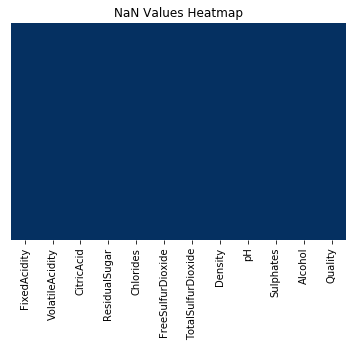

In [10]:
#looking for NaN values via Seaborn heatmap
ax = plt.axes()
sns.heatmap(wdf.isnull(), yticklabels=False, cbar=False, cmap='RdBu_r', ax=ax)
ax.set_title('NaN Values Heatmap')

#there is no NaN values in the dataset 

In [11]:
descT = wdf.describe().transpose()
cols = list(descT)

#move 'max' column next to 'min' column for easier visual comparison
cols.insert(cols.index('25%'), cols.pop(cols.index('max')))
descT = descT.loc[:, cols]
descT

,count,mean,std,min,max,25%,50%,75%
FixedAcidity,1599.0,8.319637,1.741096,4.60000,15.90000,7.1000,7.90000,9.200000
VolatileAcidity,1599.0,0.527821,0.179060,0.12000,1.58000,0.3900,0.52000,0.640000
CitricAcid,1599.0,0.270976,0.194801,0.00000,1.00000,0.0900,0.26000,0.420000
ResidualSugar,1599.0,2.538806,1.409928,0.90000,15.50000,1.9000,2.20000,2.600000
Chlorides,1599.0,0.087467,0.047065,0.01200,0.61100,0.0700,0.07900,0.090000
FreeSulfurDioxide,1599.0,15.874922,10.460157,1.00000,72.00000,7.0000,14.00000,21.000000
TotalSulfurDioxide,1599.0,46.467792,32.895324,6.00000,289.00000,22.0000,38.00000,62.000000
Density,1599.0,0.996747,0.001887,0.99007,1.00369,0.9956,0.99675,0.997835
pH,1599.0,3.311113,0.154386,2.74000,4.01000,3.2100,3.31000,3.400000
Sulphates,1599.0,0.658149,0.169507,0.33000,2.00000,0.5500,0.62000,0.730000


In [12]:
#source: https://winefolly.com/deep-dive/understanding-acidity-in-wine/
#Fundamentally speaking, all wines lie on the acidic side of the pH spectrum and 
#most range from 2.5 to about 4.5 pH (7 is neutral).

if wdf.pH.min() >= 2.5 and wdf.pH.max() <= 4.5:
    print('Wine pH is within range.')

Wine pH is within range.


In [13]:
#imbalance in Quality class
#there are more average wines (681+638) than low (10+53) and high quality wines (199+18)

wdf.Quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: Quality, dtype: int64

(0, 800)

Text(10,0,'0.6%')

Text(53,1,'3.3%')

Text(681,2,'42.6%')

Text(638,3,'39.9%')

Text(199,4,'12.4%')

Text(18,5,'1.1%')

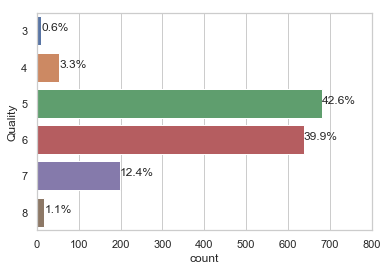

In [14]:
#now show it as a horizontal bar chart using percentage
sns.set(style="whitegrid")

ax = sns.countplot(y="Quality", data=wdf)
ax.set_xlim(0, 800)

total = len(wdf['Quality'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
    
plt.show()

In [16]:
def wineBoxPlot(df, cols, colx = 'Quality'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(colx, col, data=df)
        plt.xlabel(colx)
        plt.ylabel(col)
        plt.show()
    

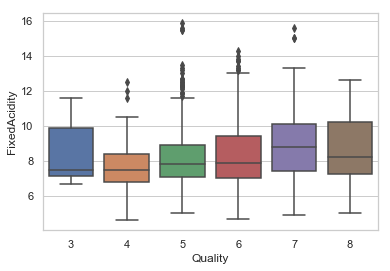

In [17]:
#many outliers for wine qualities 5 & 6

wineBoxPlot (wdf, columnNames[:1])

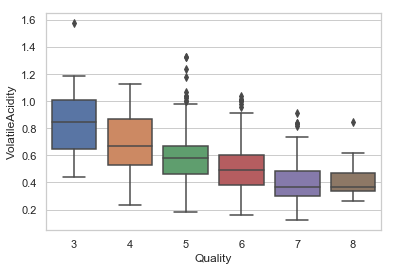

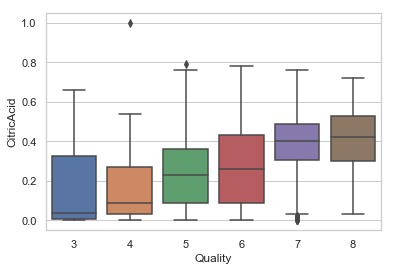

In [18]:
#good wine has lower Volatile Acidity
#good wine has higher Citric Acid
#many outliers for wine qualities 5 & 6

wineBoxPlot (wdf, columnNames[1:3])

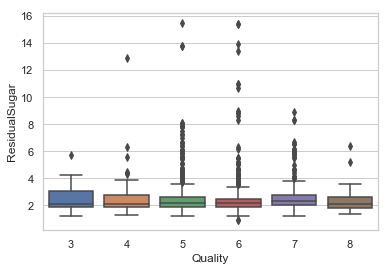

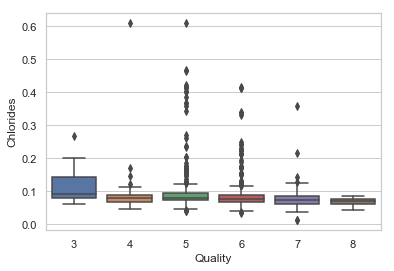

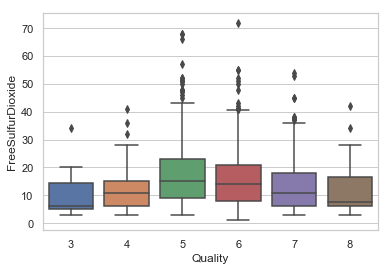

In [19]:
#many outliers for wine qualities 5 & 6
wineBoxPlot (wdf, columnNames[3:6])


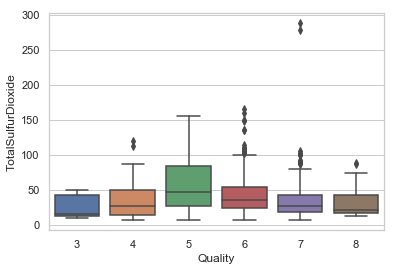

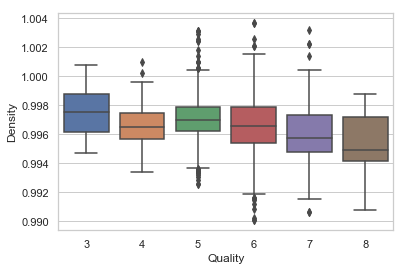

In [20]:
#good wine has lower Density
#many outliers for wine quality 5 & 6

wineBoxPlot (wdf, columnNames[6:8])

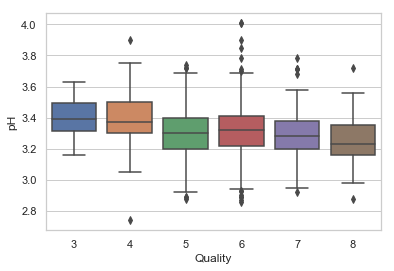

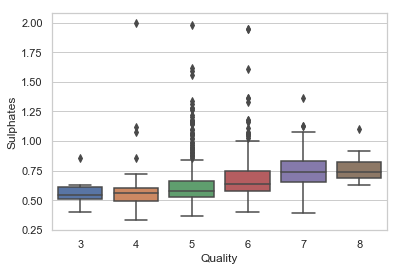

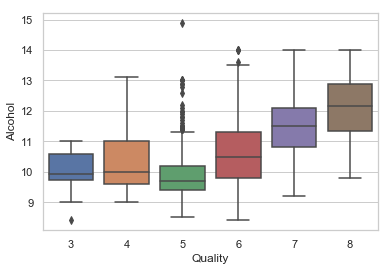

In [21]:
#good wine has lower pH
#good wine has higher Sulphates and Alcohol
#many outliers for wine qualities 5 & 6

wineBoxPlot (wdf, columnNames[8:11])

Text(0.5,1,'Red Wine - Quality vs Features Correlation')

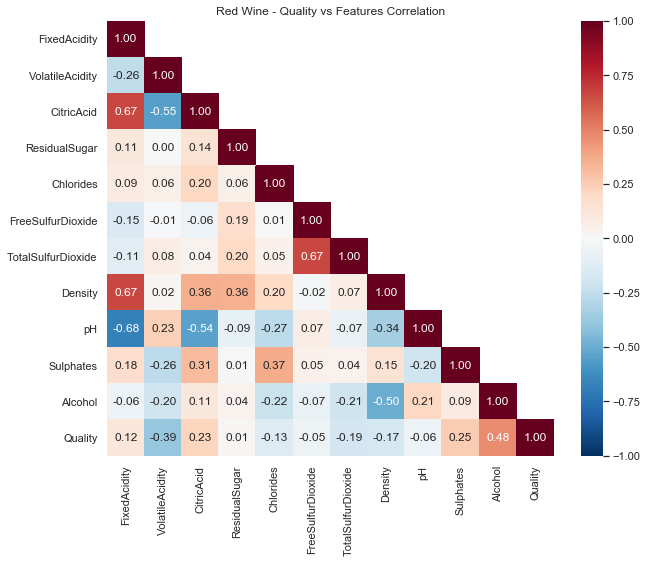

In [22]:
#plot the correlation as heatmap
corr = wdf.corr(method='pearson')

_, ax = plt.subplots(figsize=(10, 8))

mask = np.triu(corr, k=1)
sns.heatmap(corr, fmt=".2f", annot=True, vmin=-1, vmax=1, center= 0, 
            cmap='RdBu_r', mask=mask, ax=ax)
ax.set_title('Red Wine - Quality vs Features Correlation')


### 3) Correlation Observations
#### a) Relatively Highly Correlated Feature Pairs
- Citric Acid and Fixed Acidity (0.67)
- Density and Fixed Acidity (0.67)
- Free Sulfur Dioxide and Total ulfur Dioxide (0.67)

#### b) Relatively Correlated Feature Pair
- Alcohol and Quality (0.48)

#### c) Relatively Highly Inverse Correlated Feature Pairs
- Fixed Acidity and pH (-0.68)
- Citric Acid and Volatile Acidity (-0.55)
- Citric Acid and pH (-0.54)
- Alcohol and Density (-0.5)

<Figure size 1440x1584 with 0 Axes>

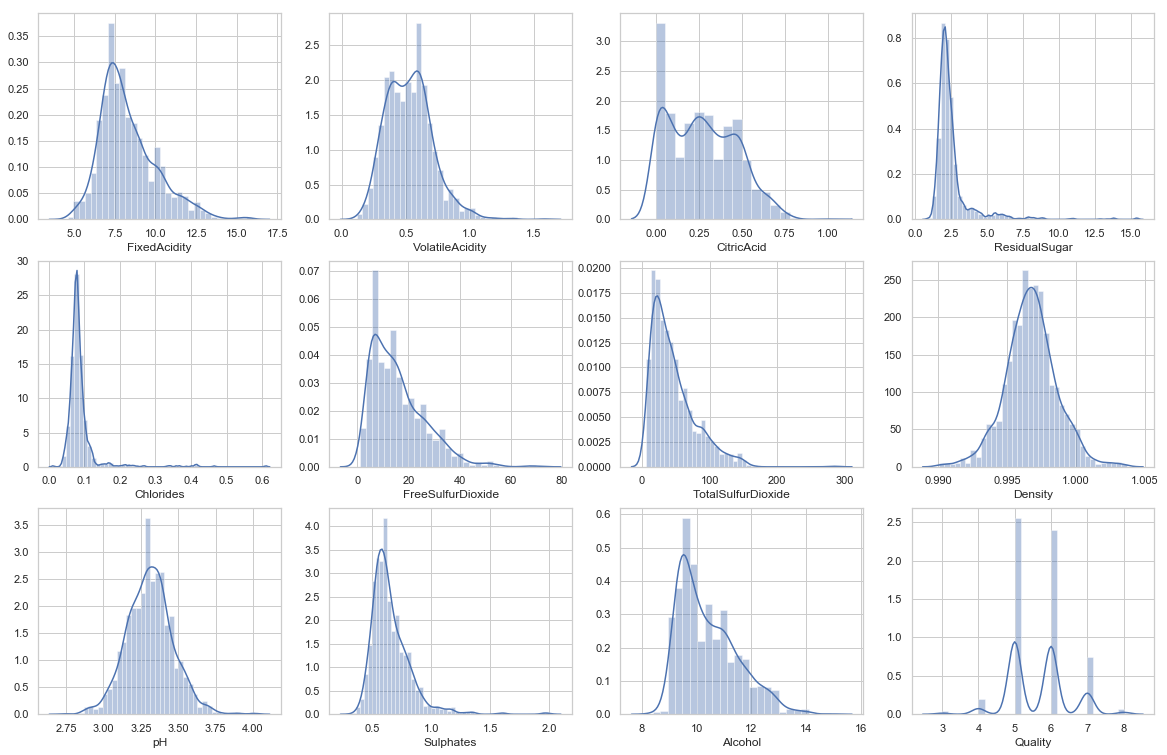

In [24]:
plt.figure(figsize = (20,22))

for i in range(1, len(wdf.columns)+1):
    plt.subplot(5,4,i)
    sns.distplot(wdf[wdf.columns[i-1]])
    
plt.show()

In [25]:
#classify the wines into Good and Excellent qualities
#bad, quality < 

bins = [0, 5, 10]
labels = ['Good', 'Excellent']
wdf['Target'] = pd.cut(x=wdf['Quality'], bins=bins, labels=labels)

wdf['Target'].astype('category')

0            Good
1            Good
2            Good
3       Excellent
4            Good
          ...    
1594         Good
1595    Excellent
1596    Excellent
1597         Good
1598    Excellent
Name: Target, Length: 1599, dtype: category
Categories (2, object): [Good < Excellent]

(0, 1000)

Text(744,0,'46.5%')

Text(855,1,'53.5%')

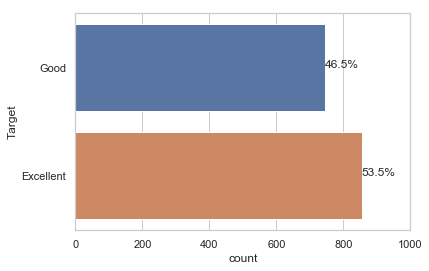

In [26]:
sns.set(style="whitegrid")

ax = sns.countplot(y="Target", data=wdf)
ax.set_xlim(0, 1000)

total = len(wdf['Target'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
    
plt.show()

# Data Standardisation

In [27]:
X = wdf.iloc[:, :11]
y = wdf['Target']

X.head()
y.head()
y.tail()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


0         Good
1         Good
2         Good
3    Excellent
4         Good
Name: Target, dtype: category
Categories (2, object): [Good < Excellent]

1594         Good
1595    Excellent
1596    Excellent
1597         Good
1598    Excellent
Name: Target, dtype: category
Categories (2, object): [Good < Excellent]

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# stdScaler = StandardScaler()
# X = stdScaler.fit_transform(X)

#use MinMaxScaler - product slightly better accuracy than StandardScaler
minmaxScaler = MinMaxScaler()
X = minmaxScaler.fit_transform(X)

print(X)

[[0.24778761 0.39726027 0.         ... 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.         ... 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.04       ... 0.40944882 0.19161677 0.21538462]
 ...
 [0.15044248 0.26712329 0.13       ... 0.53543307 0.25149701 0.4       ]
 [0.11504425 0.35958904 0.12       ... 0.65354331 0.22754491 0.27692308]
 [0.12389381 0.13013699 0.47       ... 0.51181102 0.19760479 0.4       ]]


<Figure size 360x360 with 0 Axes>

Text(0.5,0,'pc1')

Text(0,0.5,'pc2')

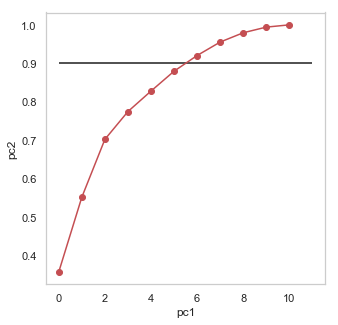

In [29]:
#perform PCA to determine important features
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
plt.figure(figsize=(5, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.hlines(y=0.90, xmin=0, xmax=11)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.grid()
plt.show()

In [30]:
pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform(X)

X_new[0]

array([-0.27183851, -0.19512531, -0.19035069,  0.02825179,  0.05555013,
       -0.0571423 , -0.04975935, -0.05369668])

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=68, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1279, 8)
(1279,)
(320, 8)
(320,)


In [32]:
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [33]:
#supress warning for scikit learn
import warnings
warnings.filterwarnings('ignore')

rowsList = []

for model in [DummyClassifier, 
              DecisionTreeClassifier, 
              KNeighborsClassifier, 
              GaussianNB, 
              LogisticRegression, 
              RandomForestClassifier,
              SVC,
              AdaBoostClassifier,
              GradientBoostingClassifier,
              BaggingClassifier
              ]:
    classifier = model()
    kfold = model_selection.KFold(n_splits=50, random_state=68)
    s = model_selection.cross_val_score(classifier, X_train, y_train, 
                                        scoring='roc_auc', cv=kfold)
    dict = {'Classifier': model.__name__, 'AUC': s.mean(), 'STD': s.std()}
    rowsList.append(dict)

df = pd.DataFrame(rowsList)
df.sort_values(by='AUC').style.hide_index()

#have run the above many times and the top 3 classifiers consistenty showed
#up are 1) RandomForestClassifier, 2) BaggingClassifier and 
#3) GradientBosstingClassifer

Classifier,AUC,STD
DummyClassifier,0.524937,0.10065
DecisionTreeClassifier,0.743654,0.0820067
KNeighborsClassifier,0.790157,0.0803794
GaussianNB,0.805291,0.0763451
AdaBoostClassifier,0.815391,0.0937826
SVC,0.82075,0.0782167
LogisticRegression,0.823302,0.0795993
GradientBoostingClassifier,0.856823,0.0798638
RandomForestClassifier,0.859426,0.0865009
BaggingClassifier,0.864448,0.0759372


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

clf_list = [RandomForestClassifier, 
            BaggingClassifier, 
            GradientBoostingClassifier]

def iterateAndTestModelAccuracy(classifier_testList=DummyClassifier):
    for model in classifier_testList:
        clf = model()
        clf.fit(X_train, y_train)
        predict = clf.predict(X_test)
        accu = accuracy_score(y_test, predict)
        cm = confusion_matrix(y_test, predict)
        print('-=-=-={}-=-=-='.format(model.__name__))
        print('Accuracy = {}%'.format(round(accu*100, 2)))
        print('Confusion Matrix\n{}\n'.format(cm))

iterateAndTestModelAccuracy(clf_list)

-=-=-=RandomForestClassifier-=-=-=
Accuracy = 75.0%
Confusion Matrix
[[141  30]
 [ 50  99]]

-=-=-=BaggingClassifier-=-=-=
Accuracy = 77.19%
Confusion Matrix
[[144  27]
 [ 46 103]]

-=-=-=GradientBoostingClassifier-=-=-=
Accuracy = 77.19%
Confusion Matrix
[[138  33]
 [ 40 109]]



In [35]:
from sklearn.model_selection import GridSearchCV

def findModelBestParams(classifier, gParams):
    model = classifier()
    gs = GridSearchCV(estimator=model, 
                  param_grid=gParams, 
                  scoring='accuracy',
                  cv=5,
                  n_jobs=-1)
    gs.fit(X_train, y_train)
    print('-=-=-={}-=-=-=-'.format(classifier.__name__))
    print('Best parameters => {}'.format(gs.best_params_))
    print('Best result => {}'.format(gs.best_score_))


In [36]:
#find best parameters for RandomForestClassifer

In [37]:
gridParams= {
    'n_estimators': [100, 200, 400, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
findModelBestParams(RandomForestClassifier, gridParams)

-=-=-=RandomForestClassifier-=-=-=-
Best parameters => {'bootstrap': True, 'criterion': 'gini', 'n_estimators': 200}
Best result => 0.8100078186082877


In [38]:
#find best paramters for BaggingClassifer

In [41]:
gridParams= {
    'n_estimators': [100, 200, 400, 800, 1000],
    'bootstrap': [True, False]
}
findModelBestParams(BaggingClassifier, gridParams)

-=-=-=BaggingClassifier-=-=-=-
Best parameters => {'bootstrap': True, 'n_estimators': 1000}
Best result => 0.8068803752931978


In [42]:
#find best paramters for GridentBoostingClassifer

In [43]:
gridParams= {
    'n_estimators': [100, 200, 400, 800, 1000],
    'criterion': ['friedman_mse', 'mae'],
    'subsample': [0.1, 0.5, 0.1],
    'loss': ['deviance', 'exponential']
}
findModelBestParams(GradientBoostingClassifier, gridParams)

-=-=-=GradientBoostingClassifier-=-=-=-
Best parameters => {'criterion': 'friedman_mse', 'loss': 'exponential', 'n_estimators': 800, 'subsample': 0.5}
Best result => 0.7920250195465207


In [44]:
#train data with new parameters using RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=200, criterion='gini', bootstrap=True)
rf_classifier.fit(X_train, y_train)
rf_predict = rf_classifier.predict(X_test)

accu = accuracy_score(y_test, rf_predict)
cm = confusion_matrix(y_test, rf_predict)
print('-=-=-=RandomForestClassifier-=-=-=')
print('Accuracy = {}%'.format(round(accu*100, 2)))
print('Confusion Matrix\n{}\n'.format(cm))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

-=-=-=RandomForestClassifier-=-=-=
Accuracy = 76.88%
Confusion Matrix
[[140  31]
 [ 43 106]]



In [52]:
#train data with new parameters using BaggingClassifier

In [47]:
from sklearn.ensemble import BaggingClassifier

bg_classifier = BaggingClassifier(n_estimators=1000, bootstrap=True, oob_score=False)
bg_classifier.fit(X_train, y_train)
bg_predict = bg_classifier.predict(X_test)

accu = accuracy_score(y_test, bg_predict)
cm = confusion_matrix(y_test, bg_predict)
print('-=-=-=BaggingClassifier-=-=-=')
print('Accuracy = {}%'.format(round(accu*100, 2)))
print('Confusion Matrix\n{}\n'.format(cm))

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=1000,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

-=-=-=BaggingClassifier-=-=-=
Accuracy = 76.56%
Confusion Matrix
[[138  33]
 [ 42 107]]



In [48]:
#train data with new parameters using GradientBoostingClassifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(criterion='friedman_mse', loss='deviance', n_estimators=800, subsample=0.5)
gb_classifier.fit(X_train, y_train)
gb_predict = gb_classifier.predict(X_test)

accu = accuracy_score(y_test, gb_predict)
cm = confusion_matrix(y_test, gb_predict)
print('-=-=-=GradientBoostingClassifier-=-=-=')
print('Accuracy = {}%'.format(round(accu*100, 2)))
print('Confusion Matrix\n{}\n'.format(cm))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=800,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

-=-=-=GradientBoostingClassifier-=-=-=
Accuracy = 75.94%
Confusion Matrix
[[139  32]
 [ 45 104]]



In [50]:
#cross validation performed on ReandomForrestClassifier

In [51]:
# cross validation of RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, 
                                                    random_state=68, stratify=y)
all_accuracies = cross_val_score(estimator=rf_classifier, 
                                 X=X_train, 
                                 y=y_train, cv=10)

print('Accuracies obtained after performing K-fold\n',all_accuracies)
print('Accuracy mean =', all_accuracies.mean())
print('Standard Deviation = ', all_accuracies.std())

Accuracies obtained after performing K-fold
 [0.84722222 0.80555556 0.79166667 0.83333333 0.77777778 0.86111111
 0.86111111 0.80555556 0.80555556 0.83916084]
Accuracy mean = 0.8228049728049728
Standard Deviation =  0.027926605343545925


# SVM Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

svm_classifier = SVC(gamma='auto')
svm_classifier.fit(X_train, y_train)
svm_predict = svm_classifier.predict(X_test)

In [ ]:
svm_classifier_cmatrix = confusion_matrix(y_test, svm_predict)
svm_classifier_accScore = accuracy_score(y_test, svm_predict)

print(svm_classifier_cmatrix)
print(svm_classifier_accScore  * 100)

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predict = dt_classifier.predict(X_test)

In [ ]:
dt_classifier_cmatrix = confusion_matrix(y_test, dt_predict)
dt_classifier_accScore = accuracy_score(y_test, dt_predict)

print(dt_classifier_cmatrix)
print(dt_classifier_accScore  * 100)

# Naive BayesClassifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_predict = nb_classifier.predict(X_test)

In [ ]:
nb_classifier_cmatrix = confusion_matrix(y_test, nb_predict)
nb_classifier_accScore = accuracy_score(y_test, nb_predict)

print(nb_classifier_cmatrix)
print(nb_classifier_accScore  * 100)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy', bootstrap=True)
rf_classifier.fit(X_train, y_train)
rf_predict = rf_classifier.predict(X_test)


In [ ]:
rf_classifier_cmatrix = confusion_matrix(y_test, rf_predict)
rf_classifier_accScore = accuracy_score(y_test, rf_predict)

print(rf_classifier_cmatrix)
print(rf_classifier_accScore  * 100)

In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=rf_classifier, X=X_train, y=y_train, cv=5)

In [ ]:
print(all_accuracies)
print(all_accuracies.mean())
print(all_accuracies.std())

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

gs = GridSearchCV(estimator=rf_classifier, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

In [ ]:
best_parameters = gs.best_params_
print(best_parameters)

In [ ]:
best_result = gs.best_score_
print(best_result)

In [ ]:
rf_classifier.get_params()

# GradientBoosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=500, loss='deviance', subsample=0.5, criterion='friedman_mse')
gb_classifier.fit(X_train, y_train)
gb_predict = gb_classifier.predict(X_test)

In [ ]:
gb_classifier_cmatrix = confusion_matrix(y_test, gb_predict)
gb_classifier_accScore = accuracy_score(y_test, gb_predict)

print(gb_classifier_cmatrix)
print(gb_classifier_accScore  * 100)

# Tuning

In [ ]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=gb_classifier, X=X_train, y=y_train, cv=5)

print(all_accuracies)
print(all_accuracies.mean())
print(all_accuracies.std())

In [ ]:
from sklearn.model_selection import GridSearchCV

gb_classifier.get_params()

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['friedman_mse', 'mae'],
    'subsample': [0.1, 0.5, 0.1],
    'loss': ['deviance', 'exponential']
}

gs = GridSearchCV(estimator=gb_classifier, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

In [ ]:
best_parameters = gs.best_params_
print(best_parameters)

best_result = gs.best_score_
print(best_result)

## Testing which algorithm to explore

In [ ]:
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier


In [ ]:
import warnings
warnings.filterwarnings('ignore')

rowsList = []

for model in [DummyClassifier, 
              DecisionTreeClassifier, 
              KNeighborsClassifier, 
              GaussianNB, 
              LogisticRegression, 
              RandomForestClassifier,
              SVC,
              AdaBoostClassifier,
              GradientBoostingClassifier,
              BaggingClassifier
              ]:
    classifier = model()
    kfold = model_selection.KFold(n_splits=30, random_state=123)
    s = model_selection.cross_val_score(classifier, X, y, scoring='roc_auc', cv=kfold)
    #print(f'{model.__name__:30} AUC: ' f'{s.mean():.3f} STD: {s.std():.2f}')
    dict = {'Classifier': model.__name__, 'AUC': s.mean(), 'STD': s.std()}
    rowsList.append(dict)

df = pd.DataFrame(rowsList)


In [ ]:
df.sort_values(by='AUC').style.hide_index()

# Cross Validation